----------------

# Отчет по лабораторной работе: "Метрические методы обучения"

---------

## Дата выполнения лабораторной работы

`04.01.2025`

---

## Название лабораторной работы 

`"Метрические методы обучения"`

---

## Цель лабораторной работы

`Разработать и обучить модель k-ближайших соседей для предсказания коэффициента биоконцентрации (logBCF) на основе молекулярных дескрипторов`


----------------------

## Задачи лабораторной работы

1. Подготовить данные: вычислить молекулярные дескрипторы, провести их нормализацию и разделение на выборки.

2. Разработать модель k-ближайших соседей и подобрать оптимальные гиперпараметры с помощью GridSearchCV.

3. Оценить качество модели с использованием метрик Q2 и RMSE, сравнить с нулевой моделью.

4. Визуализировать результаты и сохранить лучшую модель с использованием pickle.dump.

----

## Материалы, использовавшиеся для выполнения лабораторной работы (программы, исходные файлы ?) 


1. [Официальная документация scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)

----

## Поэтапное изложение процедуры

Ход работы

1. Загрузка данных

Для построения модели была использована библиотека rdkit для обработки файла logBCF.sdf. Данные были загружены и преобразованы в числовые дескрипторы.

2. Создание набора дескрипторов

Были рассчитаны молекулярные дескрипторы с использованием rdkit и PaDEL-Descriptor. Из полученного набора были отобраны наиболее информативные признаки с учетом корреляции и важности.

3. Нормализация данных

Выбранные дескрипторы были приведены к единому масштабу с использованием StandardScaler и MinMaxScaler из библиотеки sklearn для улучшения работы модели.

Разделение данных на выборки

Исходные данные были разделены на:

Обучающую выборку (80%)

Тестовую выборку (20%)
Разбиение выполнено с помощью train_test_split из sklearn.

Построение модели k-ближайших соседей

Для предсказания коэффициента биоконцентрации logBCF была построена модель k-ближайших соседей (KNeighborsRegressor из sklearn). Подбирались различные гиперпараметры:

Количество соседей (n_neighbors): от 1 до 20

Подбор гиперпараметров осуществлялся с использованием GridSearchCV.


-----

## Результаты работы (+ таблицы, графики, иллюстрации?, если требуются)

Результаты работы показали, что дескрипторы отобранные методом главных компонент оказывают плохое влияние на модель. Количество соседей у них набольшее, метрика Q2 наименьшая (в некоторых местах даже отрицательная). Базовые физико-химические дескрипторы оказались пригодными для модели 


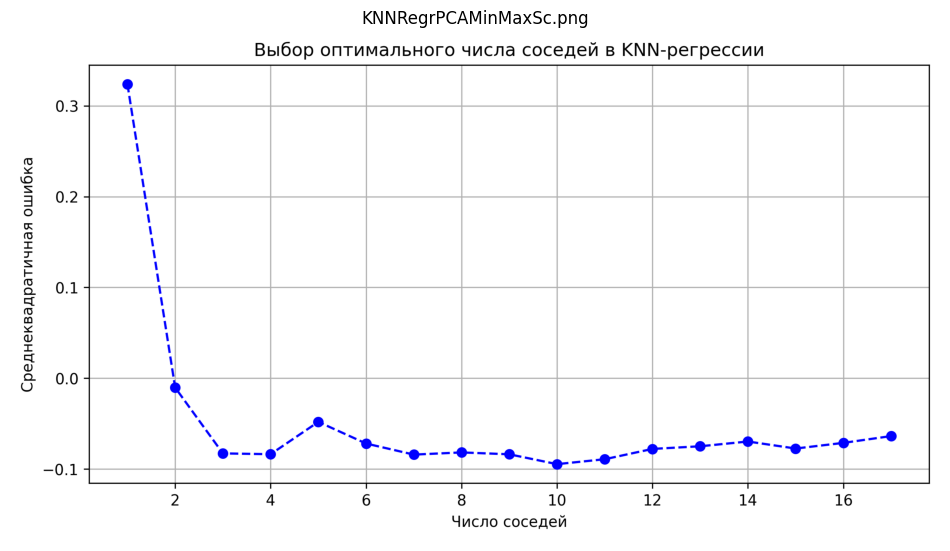

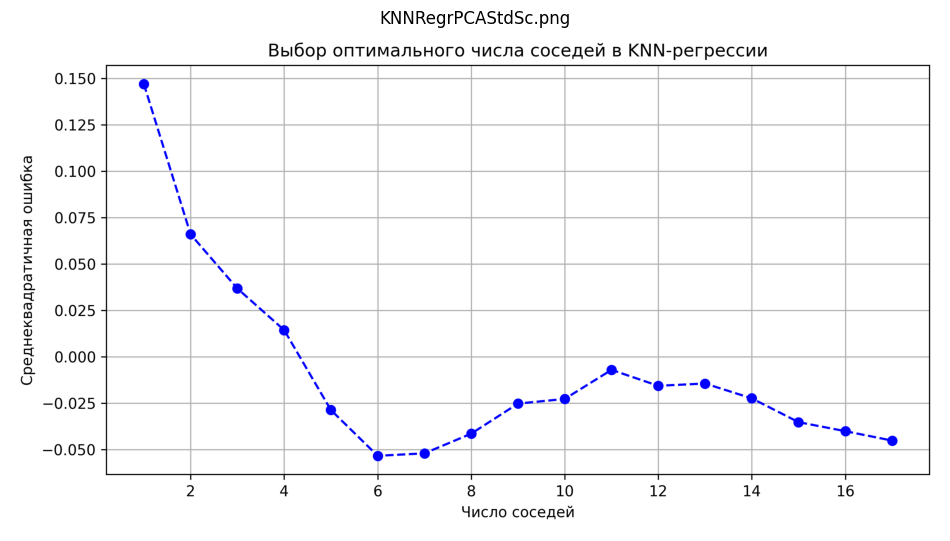

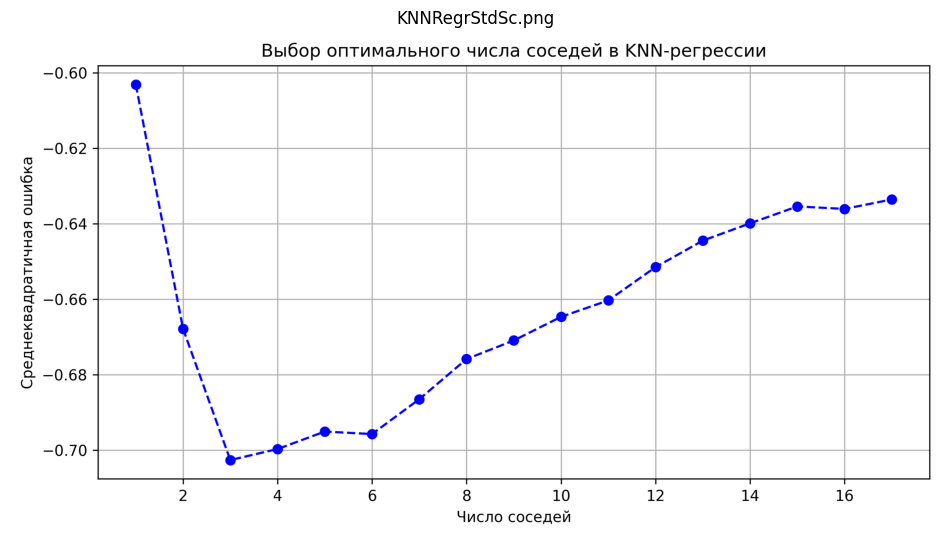

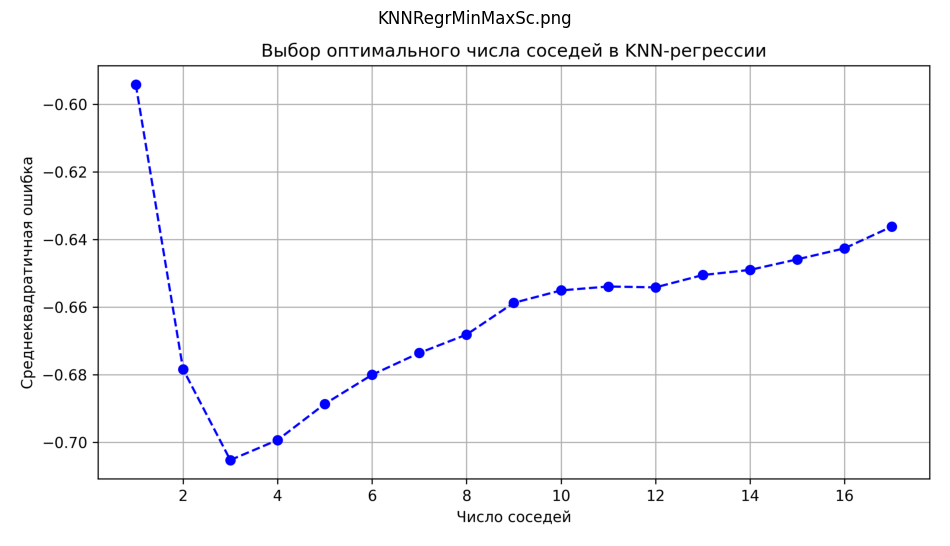

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

folder_path = "./plot"

image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_file)
    plt.show()

In [3]:
import pandas as pd
pd.read_csv("knnregr.csv")

,model,size_x_test,r2_train,q2_test,rmse,mean_time_fit_s_cv,mean_ram_fit_mb,size_model_pipeline_mb,grade,params
0,KNNRegrMinMaxSc,25%,0.87,0.70,0.72,0.0,0.07,0.08,False,{'n_neighbors': np.int64(3)}
1,KNNRegrStdSc,25%,0.87,0.71,0.71,0.0,0.00,0.08,False,{'n_neighbors': np.int64(3)}
2,KNNRegrPCAStdSc,25%,0.31,-0.03,1.40,0.0,0.01,0.08,False,{'n_neighbors': np.int64(6)}
3,KNNRegrPCAMinMaxSc,25%,0.24,0.07,1.33,0.0,0.00,0.04,False,{'n_neighbors': np.int64(10)}


----

## Выводы 


Построена и обучена модель k-ближайших соседей для предсказания коэффициента биоконцентрации logBCF. Проведен подбор гиперпараметров с использованием GridSearchCV